# Generate Posterior Plot

This section plots generates the posterior plot, using quantiles to calculate the errors.
This is related to Figure 5 in the paper

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from anesthetic import read_chains

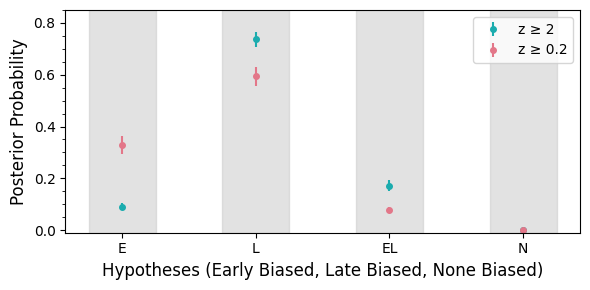

In [ ]:
# Number of Monte Carlo samples
nsamples = 10000

# ------------------- z > 0.2 chains -------------------
chain_paths_z2 = [
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/distant_vs_local/updated_priors/hyp_1/chains/gaussian",
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/distant_vs_local/updated_priors/hyp_2/chains/gaussian",
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/distant_vs_local/updated_priors/hyp_3/chains/gaussian",
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/distant_vs_local/updated_priors/hyp_4/chains/gaussian",
]

logZ_means_z2, logZ_errors_z2 = [], []
for i, path in enumerate(chain_paths_z2, 1):
    try:
        samples = read_chains(path)
        bayesian_stats = samples.stats(nsamples)
        if "logZ" in bayesian_stats:
            logZ_means_z2.append(bayesian_stats["logZ"].mean())
            logZ_errors_z2.append(bayesian_stats["logZ"].std())
    except Exception as e:
        print(f"Error processing Hypothesis {i} (z>=2): {e}")

logZ_means_z2 = np.array(logZ_means_z2)
logZ_errors_z2 = np.array(logZ_errors_z2)
logZ_samples_z2 = np.random.normal(loc=logZ_means_z2[:, None], scale=logZ_errors_z2[:, None], size=(len(logZ_means_z2), nsamples))
Z_samples_z2 = np.exp(logZ_samples_z2)
Z_samples_z2 /= np.max(Z_samples_z2, axis=0)
posterior_samples_z2 = Z_samples_z2 / np.sum(Z_samples_z2, axis=0)
posterior_medians_z2 = np.median(posterior_samples_z2, axis=1)
posterior_lower_errors_z2 = posterior_medians_z2 - np.percentile(posterior_samples_z2, 16, axis=1)
posterior_upper_errors_z2 = np.percentile(posterior_samples_z2, 84, axis=1) - posterior_medians_z2

# ------------------- z > 2 chains -------------------
chain_paths_zlt2 = [
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/early_vs_late/updated_priors/hyp_1/chains/gaussian",
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/early_vs_late/updated_priors/hyp_2/chains/gaussian",
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/early_vs_late/updated_priors/hyp_3/chains/gaussian",
    "/home/quantom97/PolyChordLite/my_tests/bias_cov_fitting/hypotheses/early_vs_late/updated_priors/hyp_4/chains/gaussian",
]

logZ_means_zlt2, logZ_errors_zlt2 = [], []
for i, path in enumerate(chain_paths_zlt2, 1):
    try:
        samples = read_chains(path)
        bayesian_stats = samples.stats(nsamples)
        if "logZ" in bayesian_stats:
            logZ_means_zlt2.append(bayesian_stats["logZ"].mean())
            logZ_errors_zlt2.append(bayesian_stats["logZ"].std())
    except Exception as e:
        print(f"Error processing Hypothesis {i} (z<2): {e}")

logZ_means_zlt2 = np.array(logZ_means_zlt2)
logZ_errors_zlt2 = np.array(logZ_errors_zlt2)
logZ_samples_zlt2 = np.random.normal(loc=logZ_means_zlt2[:, None], scale=logZ_errors_zlt2[:, None], size=(len(logZ_means_zlt2), nsamples))
Z_samples_zlt2 = np.exp(logZ_samples_zlt2)
Z_samples_zlt2 /= np.max(Z_samples_zlt2, axis=0)
posterior_samples_zlt2 = Z_samples_zlt2 / np.sum(Z_samples_zlt2, axis=0)
posterior_medians_zlt2 = np.median(posterior_samples_zlt2, axis=1)
posterior_lower_errors_zlt2 = posterior_medians_zlt2 - np.percentile(posterior_samples_zlt2, 16, axis=1)
posterior_upper_errors_zlt2 = np.percentile(posterior_samples_zlt2, 84, axis=1) - posterior_medians_zlt2

# ------------------- Plot -------------------
hypotheses = ["E", "L", "EL", "N"]
x_positions = np.arange(len(hypotheses))

plt.figure(figsize=(6, 3))

# Shaded areas for readability
for i in range(len(hypotheses)):
    plt.axvspan(i - 0.25, i + 0.25, color="#C7C7C7", alpha=0.5)

# Plot z > 2 (in blue)
plt.errorbar(x_positions, posterior_medians_zlt2,
             yerr=[posterior_lower_errors_zlt2, posterior_upper_errors_zlt2],
             fmt='o', color='#1bacae', ecolor='#1bacae', capsize=0,
             linestyle='None', markersize=4, label='z ≥ 2')

# Plot z > 0.2 (in red)
plt.errorbar(x_positions, posterior_medians_z2,
             yerr=[posterior_lower_errors_z2, posterior_upper_errors_z2],
             fmt='o', color='#e37789', ecolor='#e37789', capsize=0,
             linestyle='None', markersize=4, label='z ≥ 0.2')



# Customize x-axis
plt.xticks(x_positions, hypotheses, fontsize=10)
plt.gca().tick_params(axis='x', which='minor', bottom=False)
plt.minorticks_on()

# Labels, legend, and limits
plt.xlabel("Hypotheses (Early Biased, Late Biased, None Biased)", fontsize=12)
plt.ylabel("Posterior Probability", fontsize=12)
plt.ylim(-0.01, 0.85)
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig("early_vs_late_combined.pdf", bbox_inches="tight", dpi=300)
plt.show()
